In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(2)

In [2]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(D_in, H1),
            nn.Sigmoid(),
            nn.Linear(H1, H2),
            nn.Sigmoid(),
            nn.Linear(H2, D_out)
        )

    def forward(self, x):
        return self.net(x)

In [3]:
class Net_Tanh(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(D_in, H1),
            nn.Tanh(),
            nn.Linear(H1, H2),
            nn.Tanh(),
            nn.Linear(H2, D_out)
        )

    def forward(self, x):
        return self.net(x)

In [4]:
class Net_Relu(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(D_in, H1),
            nn.ReLU(),
            nn.Linear(H1, H2),
            nn.ReLU(),
            nn.Linear(H2, D_out)
        )

    def forward(self, x):
        return self.net(x)

In [5]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
    
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

In [6]:
train_dataset = dsets.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())

In [7]:
criterion = nn.CrossEntropyLoss()

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [9]:
input_dim = 28 * 28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

In [10]:
learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_result = train(model, criterion, train_loader, validation_loader, optimizer, epochs=10)

In [11]:
learning_rate = 0.01
model = Net_Tanh(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_result_tanh = train(model, criterion, train_loader, validation_loader, optimizer, epochs=10)

In [12]:
learning_rate = 0.01
model = Net_Relu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_result_relu = train(model, criterion, train_loader, validation_loader, optimizer, epochs=10)

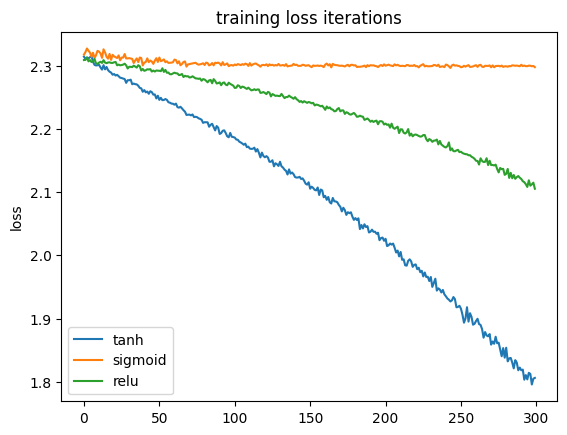

In [13]:
plt.plot(training_result_tanh['training_loss'], label='tanh')
plt.plot(training_result['training_loss'], label='sigmoid')
plt.plot(training_result_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

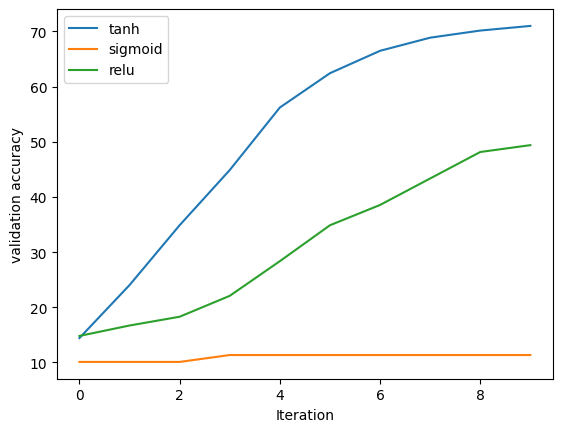

In [14]:
plt.plot(training_result_tanh['validation_accuracy'], label = 'tanh')
plt.plot(training_result['validation_accuracy'], label = 'sigmoid')
plt.plot(training_result_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()